In [8]:
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
import numpy as np
import random

In [14]:
def avg_message_passing_length(G, n):
    total_length = 0
    count = 0
    for node_1 in G.nodes():
        # print(node_1)
        for node_2 in G.nodes():
            # print(f"Node2: {node_2}")
            count += 1
            one_time_length = 0
            now_node = node_1
            in_list = []
            while now_node != node_2:
                in_list.append(now_node)
                # print(f"Now node: {now_node}")
                min_distance_index = 0
                min_distance = n
                neighbor_list = list(G.neighbors(now_node))
                for i, neighbor in enumerate(neighbor_list):
                    if neighbor in in_list:
                        continue
                    # print(neighbor)
                    distance = abs(neighbor - node_2)
                    if distance < min_distance:
                        min_distance = distance
                        min_distance_index = i
                now_node = neighbor_list[min_distance_index]
                one_time_length += 1
            total_length += one_time_length
    return total_length / count
        

In [15]:
import random
# n: numeber of nodes
# q: number of long-range contacts
# r: clustering exponent
            
def watts_strogatz_kleinberg_graph_1D(n, q, r):
    G = nx.path_graph(n)
    long_contact_prob = float(q/n)
    in_list = []
    
    for node_1 in G.nodes():
        if node_1 in in_list:
            continue
        total_prob = 0
        prob_list = []

        for node_2 in G.nodes():
            distance = abs(node_2 - node_1)
            if distance == 0:
                prob_list.append(0)
                continue
            prob = (1 / distance**r)
            prob_list.append(prob)
            total_prob += prob
        prob_list = [x / total_prob for x in prob_list]
        for i in range(1, len(prob_list)):
            prob_list[i] = prob_list[i] + prob_list[i-1]
        # q=1
        random_number = random.random()
        for i in range(len(prob_list)):
            if random_number <= prob_list[i]:
                G.add_edge(i, node_1)
                in_list.append(i)
                break
    # print(G.edges(1))
    return G, avg_message_passing_length(G, n)

graph, length = watts_strogatz_kleinberg_graph_1D(50, 1, 2)
print(f"Length: {length}")
graph.edges(1)

Length: 12.3072


EdgeDataView([(1, 0), (1, 2), (1, 4)])

  0%|          | 0/30 [00:00<?, ?it/s]

  3%|▎         | 1/30 [00:40<19:37, 40.59s/it]

24.841466


  7%|▋         | 2/30 [01:37<23:17, 49.90s/it]

23.013354


 10%|█         | 3/30 [02:27<22:30, 50.00s/it]

21.436043


 13%|█▎        | 4/30 [03:09<20:19, 46.92s/it]

20.867481


 17%|█▋        | 5/30 [03:28<15:22, 36.91s/it]

19.583747


 20%|██        | 6/30 [03:47<12:18, 30.78s/it]

19.39773


 23%|██▎       | 7/30 [04:06<10:22, 27.07s/it]

19.3318


 27%|██▋       | 8/30 [04:25<08:56, 24.40s/it]

18.774808


 30%|███       | 9/30 [04:43<07:47, 22.25s/it]

18.972017


 33%|███▎      | 10/30 [05:02<07:10, 21.54s/it]

20.782017


 37%|███▋      | 11/30 [05:21<06:32, 20.66s/it]

20.424017


 40%|████      | 12/30 [05:43<06:18, 21.00s/it]

22.93032


 43%|████▎     | 13/30 [06:08<06:16, 22.16s/it]

25.704028


 47%|████▋     | 14/30 [06:38<06:34, 24.65s/it]

30.584071


 50%|█████     | 15/30 [07:17<07:15, 29.01s/it]

36.786499


 53%|█████▎    | 16/30 [08:24<09:24, 40.34s/it]

54.034706


 57%|█████▋    | 17/30 [09:45<11:25, 52.73s/it]

61.459752


 60%|██████    | 18/30 [11:48<14:43, 73.65s/it]

80.833784


 63%|██████▎   | 19/30 [13:59<16:41, 91.08s/it]

84.868838


 67%|██████▋   | 20/30 [16:41<18:42, 112.28s/it]

98.874616


 70%|███████   | 21/30 [18:53<17:42, 118.07s/it]

89.286928


 73%|███████▎  | 22/30 [22:45<20:17, 152.21s/it]

126.756283


 77%|███████▋  | 23/30 [28:07<23:43, 203.43s/it]

154.802823


 80%|████████  | 24/30 [36:04<28:31, 285.30s/it]

193.694654


 83%|████████▎ | 25/30 [44:55<29:56, 359.21s/it]

206.064557


 87%|████████▋ | 26/30 [53:14<26:44, 401.08s/it]

200.318551


 90%|█████████ | 27/30 [1:03:33<23:18, 466.33s/it]

227.264036


 93%|█████████▎| 28/30 [1:25:53<24:17, 728.65s/it]

235.610614


 97%|█████████▋| 29/30 [1:51:15<16:06, 966.47s/it]

258.275528


100%|██████████| 30/30 [2:19:45<00:00, 279.51s/it] 

258.051425


Text(0, 0.5, 'lnT for greedy algorithm')

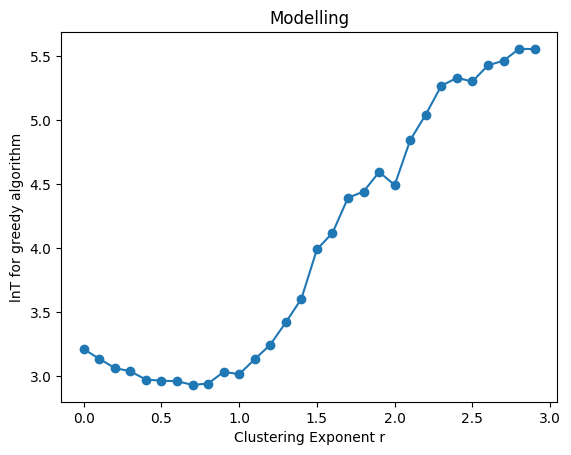

In [19]:
T = []
x = []
for r in tqdm(np.arange(0, 3, 0.1)):
    graph, length = watts_strogatz_kleinberg_graph_1D(1000, 1, r)
    print(length)
    x.append(r)
    T.append(np.log(length))

plt.plot(x, T, marker='o', linestyle='-')
plt.title('Modelling')
plt.xlabel('Clustering Exponent r')
plt.ylabel('lnT for greedy algorithm')